<a href="https://colab.research.google.com/github/mahbodnr/Mask-Detection/blob/main/Project_Brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TODO:

- <s>neuron id </s>
- define a global timestep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import count
import networkx as nx

In [2]:
dt = 0.001 #s
T = 0.1 #s
total_timepoints = int(T/ dt)

LIF:<br>
$u = u_r + \int 1/C * exp(t-t'/\tau) * I(t')dt'$

In [ ]:
class NeuronType(object):
    pass

class LIF(NeuronType):
    def __init__(self,  Rm = 1,Cm = 0.1):
        self.Rm = Rm #ohm
        self.Cm = Cm #uF
        self.tau_m = Rm*Cm

    def __call__(self, current, timestep, last_spike_timepoint,):
        potential = 0
        for timepoint in range(last_spike_timepoint, timestep + 1):
            potential += 1/self.Cm * (np.exp(-(timestep - timepoint)/self.tau_m)) * current[timepoint]
        return potential

In [46]:
class Neuron(object):
    _ids = count(0)
    def __init__(self, total_timepoints,  model = LIF(),
                 neurotransmitter = 'inhibitory', tau_ref = 4, u_rest = -68,
                 u_tresh = +30, save_potential_history = False,
                 base_current = 1):
        """
        Define a new Neuron object
        Args:

        """
        self.id = next(self._ids)
        self.model = model
        self.neurotransmitter = neurotransmitter
        self.total_timepoints = total_timepoints
        self.tau_ref = tau_ref #ms # refractory period
        self.u_rest = u_rest #mv
        self.u_tresh = u_tresh #mv
        self.base_current = base_current #mv
        self.u = self.u_rest
        self.save_potential = save_potential_history
        self.open = True
        self.current_history = np.zeros(total_timepoints)
        self.spike_train =  np.zeros(total_timepoints, dtype = np.bool)
        self.timestep = 0
        self.last_spike_timepoint = 0
        if self.save_potential:
            self.potential = np.zeros(total_timepoints)
        self.current = 0
        
    def step(self):
        assert self.timestep < self.total_timepoints, "Simulation interval has been finished!"
        # Check refactory interval
        if not open:
            if self.refactory_time < self.tau_ref:
                self.refactory_time += 1
            else:
                self.open = True
        else:
            # Add current current to current history :)
            self.current_history[self.timestep] = self.current
            # Update
            self.u = self.u_rest
            self.u += self.model(self.current_history, self.timestep, self.last_spike_timepoint)
            # Save potential history
            if self.save_potential:
                self.potential[self.timestep] = self.u
            # Spike
            if self.u > self.u_tresh:
                self.last_spike_timepoint = self.timestep + self.tau_ref
                self.spike_train[self.timestep] = True
                self.open = False
                self.refactory_time = 0 
        # Go to next time step
        self.timestep += 1
        self.current = 0

    @property
    def spike(self):
        return self.spike_train[self.timestep - 1]

In [47]:
class NeuronGroup(object):
    def __init__(self, population, total_timepoints,
                 connection_chance = 1/10, excitatory_rate = 2/10):
        self.population = population
        self.neurons = {
            Neuron(total_timepoints, 
                   neurotransmitter = 'inhibitory' if random.random() > excitatory_rate else 'excitatory')
            for _ in range(self.population)}
                

        self.network = nx.DiGraph()
        self.network.add_nodes_from(self.neurons)
        for PreSN in self.network.nodes:
            for PostSN in self.network.nodes:
                if PreSN != PostSN:
                    if random.random() < connection_chance:
                        self.network.add_edge(PreSN, PostSN, weight = np.random.normal(scale= 1))

    def step(self):
        for neuron in self.neurons:
            if neuron.current:
                neuron.step()

        for neuron in self.neurons:
            if neuron.spike:
                for _, postSN, weight in self.network.out_edges(neuron, data = 'weight'):
                    if postSN.open:
                        postSN.current += self.base_current * weight


In [50]:
class stimulus(object):
    _ids = count(0)
    def __init__(self, output):
        """
        Parameters
        ----------
        output: function
        A function that determines the output of the stimulus
        in a specific timestep.
        examples:
        output = lambda t: np.sin(2 * t)
        output = lambda t: 2

        Returns
        -------
        Returns the value of output if no connection is set.
        otherwise, sends he value to the connection (returns None).
        """
        self.timestep = 0
        self.output = output
        self.connection = None
        self.id += next(_ids)

    def connect(self, connection):
        self.connection = connection

    def step(self):
        if self.connection == None:
            print(f"WARNING: Stimulus (id: {self.id}) has not connected to any object!")
            self.timestep +=1
            return self.output(timestep)
        self.connection.current += self.output(self.timestep)
        self.timestep +=1


#Test

In [74]:
sim = simulation(1, 0.001)
sim.add(NeuronGroup(10,100))

In [77]:
r = 3
q.w = r

In [80]:
q.w

3

In [79]:
r +=1

In [48]:
G =NeuronGroup(10, 100)


In [49]:
G.step()

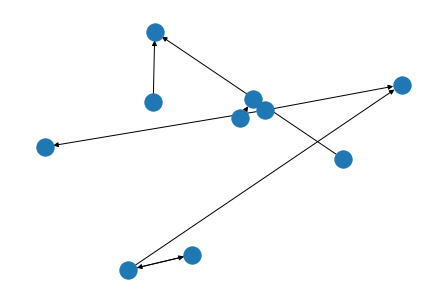

In [ ]:
printnx.draw(G.network, with_labels=False,)

In [ ]:
list(G.network.nodes.data('stored_potential', default=0))

[(<__main__.Neuron at 0x7f2253406a10>, 0),
 (<__main__.Neuron at 0x7f2253406610>, 0),
 (<__main__.Neuron at 0x7f2253406a50>, 0),
 (<__main__.Neuron at 0x7f2253406c50>, 0),
 (<__main__.Neuron at 0x7f2253406ed0>, 0),
 (<__main__.Neuron at 0x7f2253406d10>, 0),
 (<__main__.Neuron at 0x7f2253406f10>, 0),
 (<__main__.Neuron at 0x7f2253406d90>, 0),
 (<__main__.Neuron at 0x7f2253406750>, 0),
 (<__main__.Neuron at 0x7f2253406990>, 0)]

In [ ]:
[(a.id, b.id) for a,b in (G.network.edges)]

[(26, 13),
 (26, 15),
 (13, 24),
 (13, 0),
 (25, 8),
 (25, 28),
 (25, 27),
 (24, 11),
 (24, 14),
 (24, 27),
 (23, 6),
 (22, 27),
 (20, 2),
 (17, 13),
 (17, 20),
 (0, 25),
 (0, 24),
 (0, 22),
 (0, 8),
 (0, 9),
 (21, 22),
 (21, 10),
 (21, 28),
 (19, 22),
 (19, 15),
 (19, 10),
 (19, 28),
 (16, 8),
 (16, 18),
 (16, 3),
 (12, 23),
 (15, 9),
 (15, 11),
 (10, 26),
 (10, 12),
 (10, 14),
 (10, 29),
 (18, 22),
 (18, 15),
 (18, 5),
 (18, 14),
 (18, 4),
 (9, 25),
 (9, 4),
 (11, 13),
 (7, 22),
 (28, 23),
 (28, 20),
 (28, 0),
 (28, 18),
 (28, 29),
 (6, 20),
 (6, 28),
 (6, 27),
 (5, 0),
 (14, 28),
 (14, 3),
 (4, 11),
 (4, 6),
 (4, 5),
 (1, 19),
 (1, 15),
 (1, 18),
 (1, 5),
 (1, 14),
 (3, 22),
 (3, 19),
 (29, 22),
 (29, 14),
 (27, 0),
 (27, 16),
 (27, 3),
 (2, 13),
 (2, 19),
 (2, 14)]

In [ ]:
G.network.nodes.items()

ItemsView(NodeView((<__main__.Neuron object at 0x7f22512ed810>, <__main__.Neuron object at 0x7f22512ed050>, <__main__.Neuron object at 0x7f22512ed850>, <__main__.Neuron object at 0x7f22512ed890>, <__main__.Neuron object at 0x7f22512ed8d0>, <__main__.Neuron object at 0x7f22512ed910>, <__main__.Neuron object at 0x7f22512ed950>, <__main__.Neuron object at 0x7f22512ed990>, <__main__.Neuron object at 0x7f22512ed9d0>, <__main__.Neuron object at 0x7f22512eda10>, <__main__.Neuron object at 0x7f22512eda50>, <__main__.Neuron object at 0x7f22512eda90>, <__main__.Neuron object at 0x7f22512edad0>, <__main__.Neuron object at 0x7f22512edb10>, <__main__.Neuron object at 0x7f22512edb50>, <__main__.Neuron object at 0x7f22512edc10>, <__main__.Neuron object at 0x7f22512ed410>, <__main__.Neuron object at 0x7f22512edc50>, <__main__.Neuron object at 0x7f22512edcd0>, <__main__.Neuron object at 0x7f22512edd90>, <__main__.Neuron object at 0x7f22512ed590>, <__main__.Neuron object at 0x7f22512eddd0>, <__main__.Ne

In [ ]:
list(G.network.nodes)[0].id

26

In [ ]:
a.network.predecessors
for i in G.network.successors(list(G.network.nodes)[0]):
    print(i.id)

13
15


In [ ]:
G.connection_matrix.astype(np.bool)

array([[False, False, False, False, False,  True, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False,  True,
        False],
       [False, False, False, False, False,  True, False, False,  True,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False,  True, False,  True, False,
        False],
       [False,  True, False, False, False, False, False, False,  True,
         True],
       [False, False,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False, False,
         True],
       [False, False, False, False, False, False,  True, False, False,
        False]])

In [ ]:
N = Neuron(100, save_potential_history =True)
N.id

10

In [ ]:
for i in range(5):
    N.step(0)
    N.step(10)
    print(N.output)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)
    N.step(0)


True
True
True
True
True


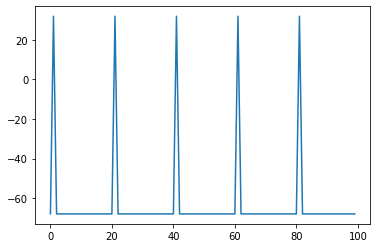

In [ ]:
plt.plot(N.potential)

In [ ]:
N.step(0)

AssertionError: ignored

In [ ]:
N.spike_train

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])